In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_size = (299, 299)
batch_size = 50
transform = ImageDataGenerator(preprocessing_function= keras.applications.inception_v3.preprocess_input, validation_split=0.2)#image transformation using model specific preprocessing

In [ ]:
train_ds = transform.flow_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2",
    subset="training", seed = 42,target_size=image_size,batch_size=batch_size
)
val_ds = transform.flow_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2",
    subset="validation", seed = 42,target_size=image_size,batch_size=batch_size
)

Found 10413 images belonging to 157 classes.
Found 2535 images belonging to 157 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
inputs = keras.Input(shape=(299, 299, 3))

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=True, input_tensor=inputs)#getting base Inception V3 model

In [ ]:
last_layer = base_model.layers[-2].output
out = Dense(units = 157, activation = 'softmax', name = 'ouput')(last_layer)
new_base_model = Model(inputs = inputs, outputs = out)

In [ ]:
for layer in new_base_model.layers[:-45]:#setting first few layers to not be trainable
  layer.trainable = False

In [ ]:
new_base_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
new_base_model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode = 'min')

In [ ]:
history = new_base_model.fit_generator(generator = train_ds, epochs=50,  validation_data = val_ds,callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
209/209 [==============================] - 6696s 32s/step - loss: 2.6130 - accuracy: 0.3736 - val_loss: 1.7348 - val_accuracy: 0.5444
Epoch 2/50
209/209 [==============================] - 136s 649ms/step - loss: 0.7705 - accuracy: 0.7987 - val_loss: 1.5021 - val_accuracy: 0.5874
Epoch 3/50
209/209 [==============================] - 138s 662ms/step - loss: 0.2410 - accuracy: 0.9451 - val_loss: 1.0504 - val_accuracy: 0.7053
Epoch 4/50
209/209 [==============================] - 138s 658ms/step - loss: 0.0901 - accuracy: 0.9839 - val_loss: 0.9796 - val_accuracy: 0.7262
Epoch 5/50
209/209 [==============================] - 140s 668ms/step - loss: 0.0408 - accuracy: 0.9934 - val_loss: 0.8644 - val_accuracy: 0.7732
Epoch 6/50
209/209 [==============================] - 141s 673ms/step - loss: 0.0245 - accuracy: 0.9956 - val_loss: 0.8329 - val_accuracy: 0.7755
Epoch 7/50
209/209 [=============================

In [ ]:
new_base_model.save('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/inception_v3_brand_model_5') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/inception_v3_brand_model_5/assets


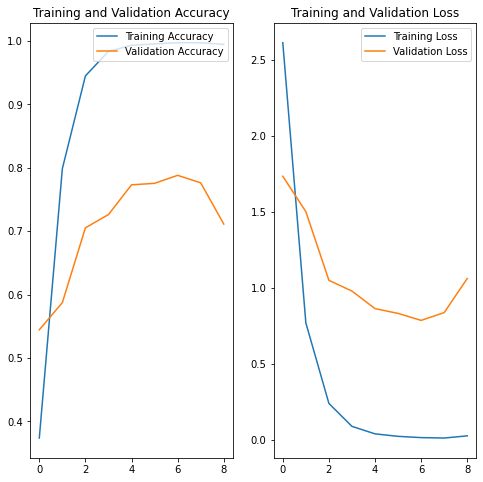

In [ ]:
acc = history.history['accuracy']#from Google tutorial. Plotting accuracy and loss values.
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.epoch))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
transform_test = ImageDataGenerator(preprocessing_function= keras.applications.inception_v3.preprocess_input)
test_ds = transform_test.flow_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2",
    seed = 42,target_size=image_size,batch_size=batch_size
)

Found 3237 images belonging to 157 classes.


In [ ]:
new_base_model.evaluate(test_ds)#test accuracy

65/65 [==============================] - 1636s 25s/step - loss: 1.0222 - accuracy: 0.7346


[1.0221894979476929, 0.734630823135376]